## Customer Churn 


![Customer Churn](https://www.touchpoint.com/wp-content/uploads/2023/02/5.-Customer-churn-article.png)

[Image Source](https://www.touchpoint.com/wp-content/uploads/2023/02/5.-Customer-churn-article.png)





## What is customer churn?

For any business in any domain, it is important to retain a consistent flow of clients to keep the company afloat. **Churn** is the exact opposite- it is the number of people *leaving* the business at a given time period. This figure becomes important when it crosses a particular threshold. 

Lets take an exmaple- 25% of the total customers are exiting every month for a firm. The company is losing a lot of money and business in this scenario. It will then huddle to analyse the causes behind this high churn rate and come up with a customer retention plan.  

## Problem Statement

Here we have a data set of `10,000` customers of a particular bank. The target variable is `Exited` which is binary- 1 if the customer leaves, 0 otherwise. There are a bunch of features as well- `gender, age, location, credit score, estimated salary` etc. 

The objective is to figure out the important features which are responsible for the churn variable. We will build a **logistic regression model** for the same.

First, let's import the basic libraries.

In [60]:
#import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## About the data 

The set has `10,000` rows & `18` columns. The Columns are-

1. `RowNumber` — corresponds to the record (row) number and has no effect on the output.

2. `CustomerId` — contains random values and has no effect on customer leaving the bank.

3. `Surname` —the surname of a customer has no impact on their decision to leave the bank.

4. `CreditScore` —can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

5. `Geography` —a customer’s location can affect their decision to leave the bank.

6. `Gender` —it’s interesting to explore whether gender plays a role in a customer leaving the bank.

7. `Age` —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

8. `Tenure` —refers to the *number of years* that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

9. `Balance` —also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

10. `NumOfProducts` —refers to the number of products that a customer has purchased through the bank.

11. `HasCrCard` —denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

12. `IsActiveMember` —active customers are less likely to leave the bank.

13. `EstimatedSalary` —as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

14. `Exited` —whether or not the customer left the bank.

15. `Complain` —customer has complaint or not.

16. `Satisfaction Score` —Score provided by the customer for their complaint resolution.

17. `Card Type` —type of card held by the customer.

18. `Points Earned` —the points earned by the customer for using credit card.

## Load the data
look at the info, stats, head and tail of the data

In [61]:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')

In [62]:
df.shape

(10000, 18)

In [63]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [64]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [65]:
#look at the data types
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [66]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [67]:
#drop 'RowNumber', 'CustomerId', 'Surname' as they are irrelevant to churn outcome

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 'columns', inplace=True)
df.dtypes 

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [69]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [70]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**Initial Observations**

- no null/missing values in the data set
- dtypes seem consistent with expectations
- Balance & Salary columns has a lot of variation- requires feature scaling 

## Exploratory Data Analysis & Visualization
 EDA is the process of analysing different features against the target/label to understand and uncover the inter-relationship between them.
 
 Let's visualize some important features against churn.

In [71]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

### Correlation Matrix

In [72]:
import seaborn as sns
sns.set_style('whitegrid')

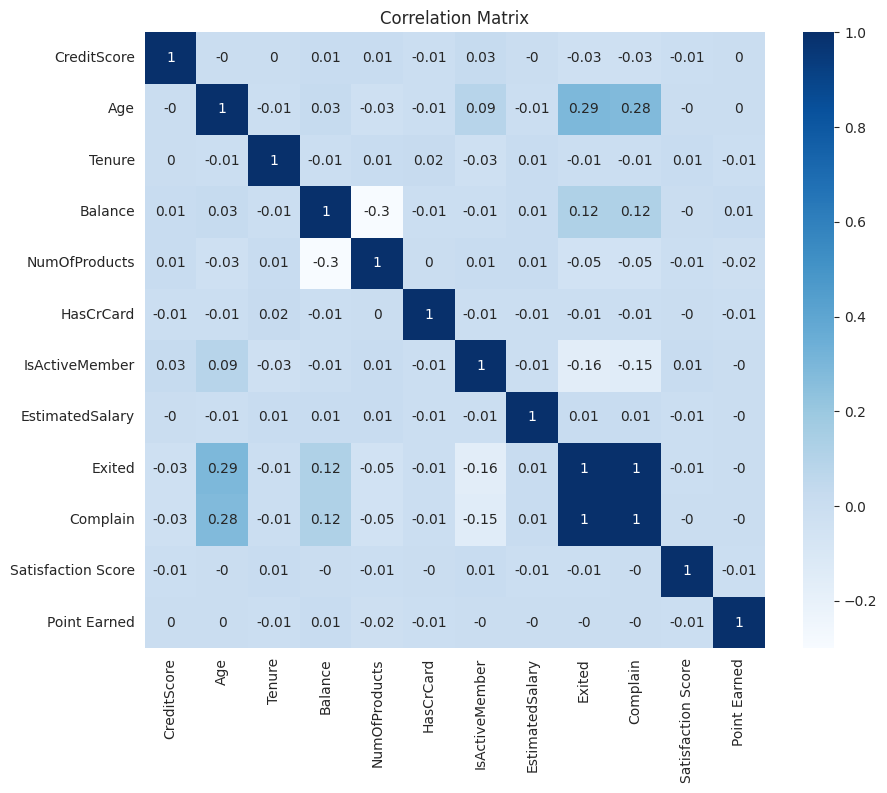

In [73]:
corr = df.corr(numeric_only = True).round(2)

plt.figure(figsize= (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot= True, cmap = 'Blues', cbar= True)
plt.show()

In [74]:
corr['Exited'].sort_values(ascending = False)

Exited                1.00
Complain              1.00
Age                   0.29
Balance               0.12
EstimatedSalary       0.01
Point Earned         -0.00
Tenure               -0.01
HasCrCard            -0.01
Satisfaction Score   -0.01
CreditScore          -0.03
NumOfProducts        -0.05
IsActiveMember       -0.16
Name: Exited, dtype: float64

<Axes: >

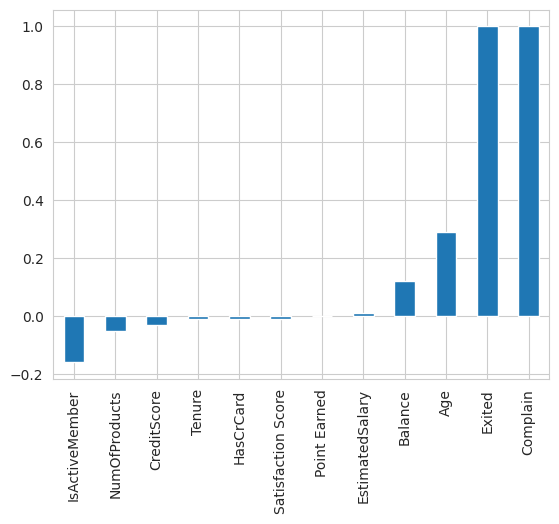

In [75]:
corr['Exited'].sort_values().plot(kind='bar')

**Observations**
1. The three important features impacting churn rate in the positive direction is balance, age, and complaint.
2. Member status, number of products and credit score are negatively correlated with exited. 
3. `Exited` & `Complain` have a 100% correlation or perfect correlation with each other. We will drop Complain from the model. 

### Churn as Target Variable
Let us now look at the target variable `Exited`'s overall distribution.

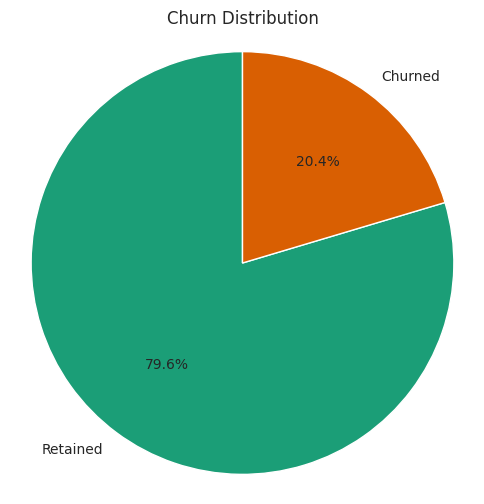

In [76]:
labels = ['Retained', 'Churned']
plt.figure(figsize = (6,6))
plt.pie(x = df['Exited'].value_counts(), labels= labels, colors=plt.cm.Dark2.colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show() 

**Observations**
- 20% of customers are exiting the bank. It is a significant number for any organisation. 

### Churn by Gender

Which gender is most likley to churn? 

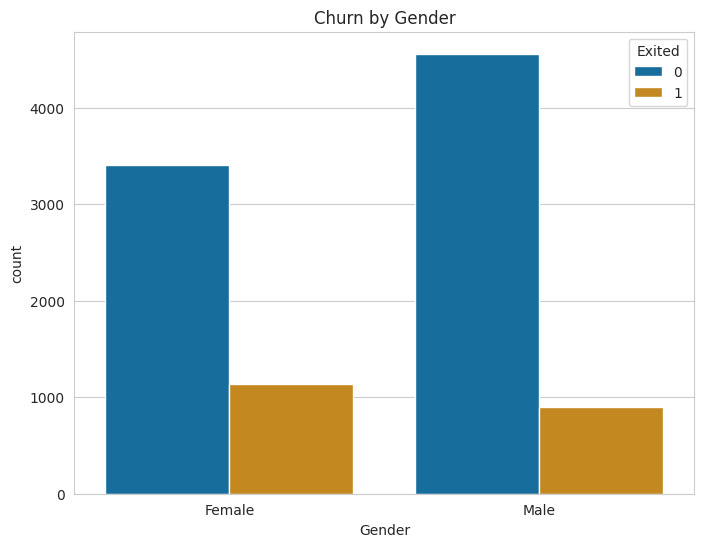

In [77]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Gender', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Gender')
plt.show()

In [78]:
#churn rate by gender

churn_rate_gender = df.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


> **25%** of customers leaving are ***female***. The corresponding figure for ***males*** is **16.47%**

### Churn by Geography

Which country is facing a higher churn rate?

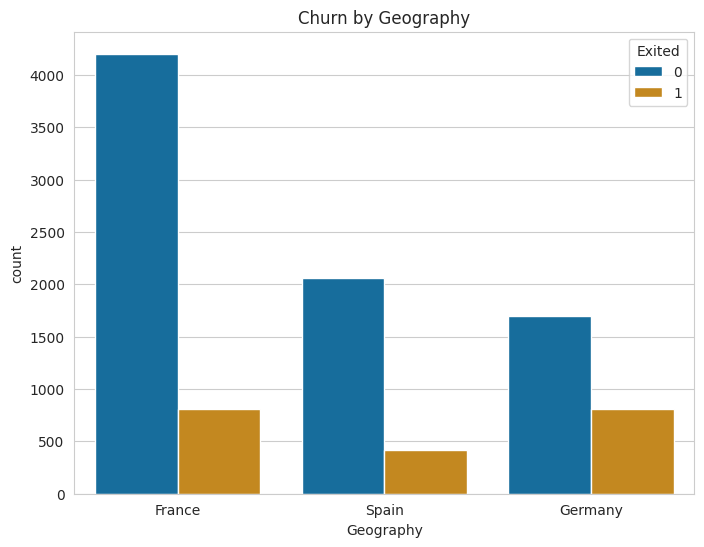

In [79]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Geography', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Geography')
plt.show() 

In [80]:
churn_rate_geography = df.groupby('Geography')['Exited'].mean()*100
print(churn_rate_geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


> **Germany has the highest churn rate at 32.44%, followed by Spain and France**

### Churn by AgeGroup

Create a new column called `AgeGroup` which puts different ages into age buckets. 

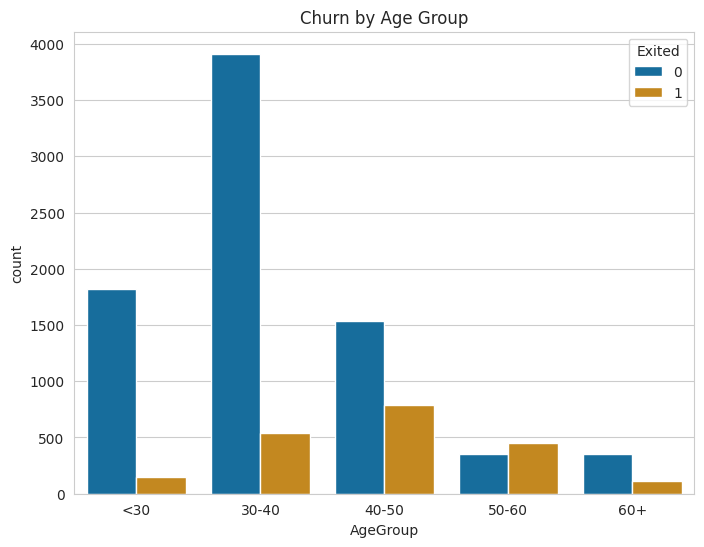

In [81]:
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf],
                        labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
plt.title('Churn by Age Group')
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette= 'colorblind')
plt.show() 

In [82]:
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-40    12.109638
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64


> **50-60 has the highest churn rate at 56.21%, followed by 40-50 at 34%, and the 60+ category at 25%. The younger customers retain.**

### Churn by Number of Products

We see a negative correlation between them, so most likely, as number of products go up,churn rate should decrease.

In [83]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'AgeGroup'],
      dtype='object')

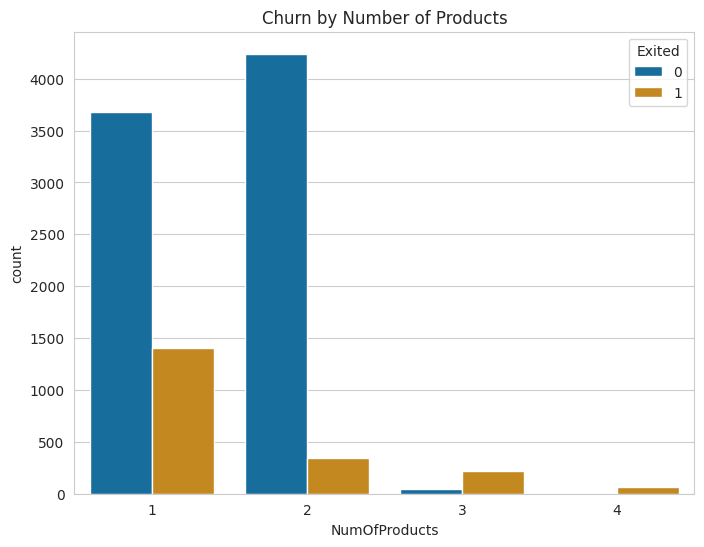

In [84]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'NumOfProducts', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Number of Products')
plt.show() 

In [85]:
churn_rate_products = df.groupby('NumOfProducts')['Exited'].mean()*100
print(churn_rate_products)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


> **customers with more than two products are most likely to leave**

### Churn vs. Credit Card
Does owning a credit card lead to more exits?

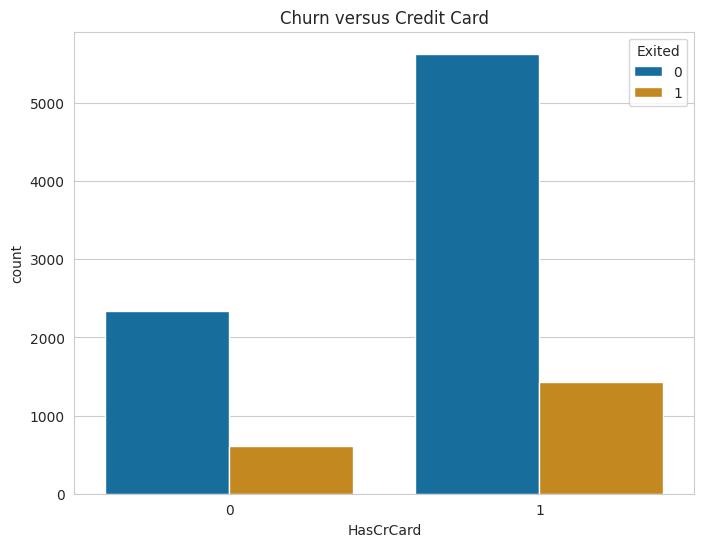

In [86]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'HasCrCard', hue = 'Exited', palette = 'colorblind')
plt.title('Churn versus Credit Card')
plt.show() 

In [87]:
churn_rate_card = df.groupby('HasCrCard')['Exited'].mean()*100
print(churn_rate_card)

HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


> **Customers with credit cards are slightly less likely to exit**

### Churn by Member Activity Status

Who are more likely to be retained? Active customers or non-active customers?

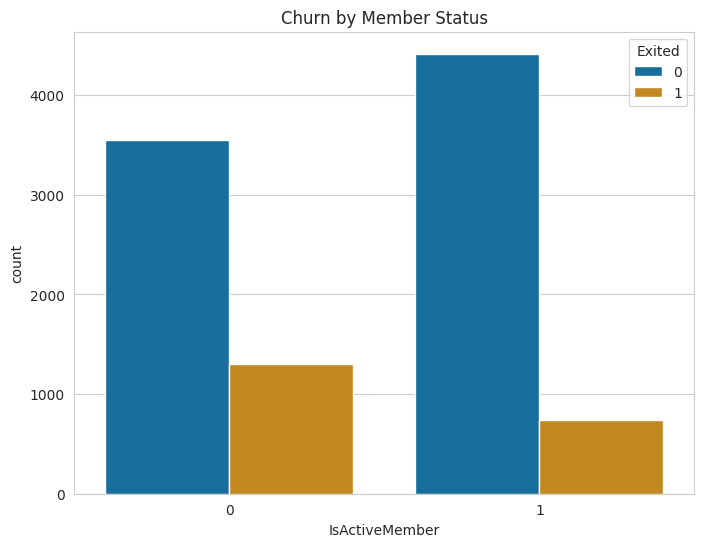

In [88]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Status')
plt.show() 

In [89]:
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


> **As expected, non-active customers are exiting more**

### Churn by Tenure

Do loyal customers stay or leave?

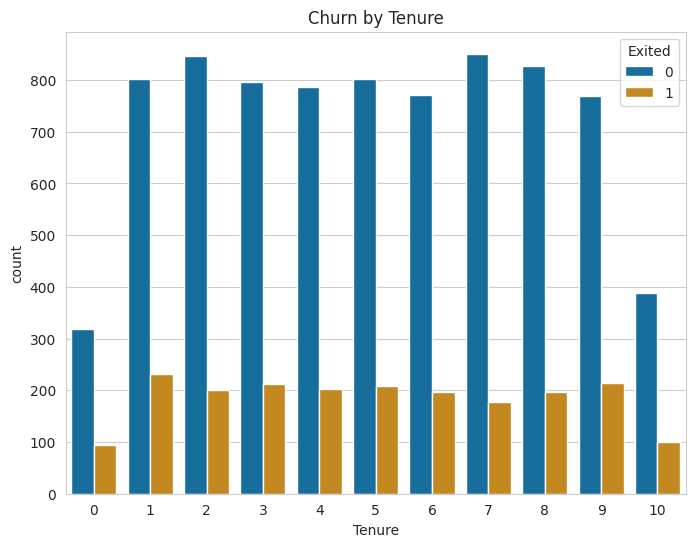

In [90]:
plt.figure(figsize = (8,6))
plt.title('Churn by Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'colorblind', data = df)
plt.show()

In [91]:
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean()*100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


> **The average churn rate is around 20% across tenures but customers with customers with ten years are *slightly less* likely to exit the bank.**

## Continuous Variables 

Let's look at some of our continuos variables and their distributions. 

### Credit Score

Credit score has a -0.03 correlation with our target variable. Let's see hoow it is distributed. 

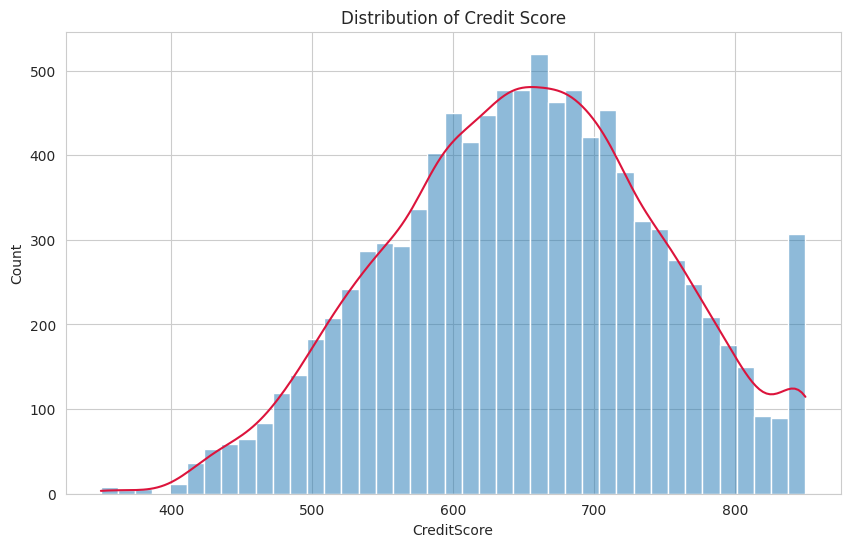

In [92]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Credit Score')
ax = sns.histplot(data = df, x = 'CreditScore', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show() 

> - The mean Credit score is about 650.
> - The variable has an almost Gaussian Distribution.

### Balance

How does the balance variable look as a distribution?

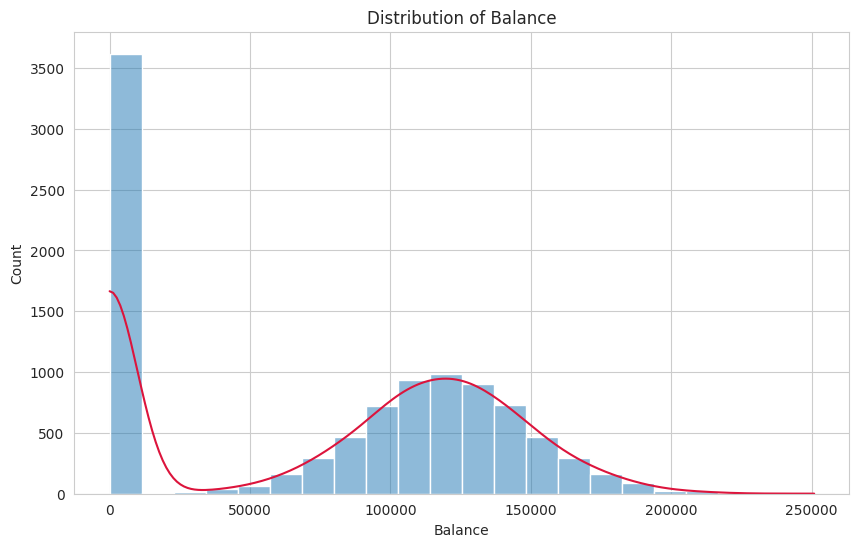

In [93]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Balance')
ax = sns.histplot(data = df, x = 'Balance', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

> - A normal distribution.
> - A little over 3500 customers have zero balance in their accounts. This is a significant outlier for a total of 10,000 clients. 

### EstimatedSalary

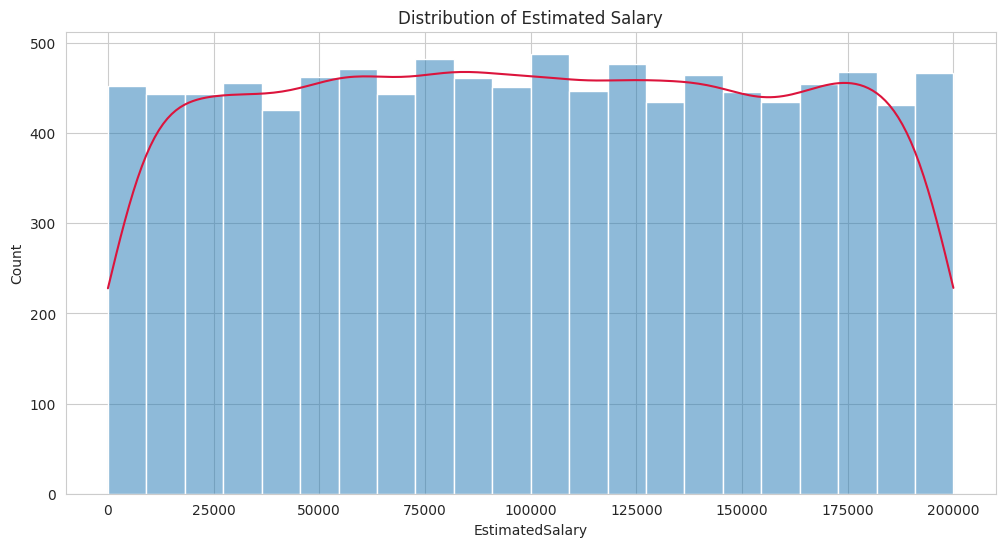

In [94]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Estimated Salary')
ax = sns.histplot(data = df, x = 'EstimatedSalary', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

> - The variable follows a **uniform distribution**

## Insights

1. The correlation matrix has an interesting relationship- the `complaint` and `Exited` variables are 100% positively correlated. 

2. Churn Rate- about 20% of customers are leaving the bank, out of the 10,000.

3. Churn vs. Features
    - `Gender`: 25.07% of female customers vis-a-vis 16.47% male customers are exiting.
    
    - `Geography`: Amongst the countries, Germany has the highest churn rate of 32.44%, followed by Spain (16.67%) and France (16.17%).
    
    - `Age Group`: The majority of customers leaving are in the 50-60 age range, with a churn rate of 56.21%, followed by the 40-50 age group with a corresponding rate of 33.96%.
    
    - `Tenure` : Even loyal customers with ten years of association have a churn rate of 20%. Customers below the one year mark have a churn rate of 23%. 
    
    - `Active Member`: Non-active members have a higher churn rate of 27% while active customers of the bank have a churn of 14%.
    
    - `Number of Products`: Interestingly, customers with higher number of products are more likely to churn. Customers who have bought 3 products have a churn rate of 83% while those who bought only one product have a churn rate of 28%.
    
4. For the continuous variables of `CreditScore`,`Balance` &`EstimatedSalary` the following was observed-
    - The mean Credit score is about 650.The variable has an almost Gaussian Distribution.
    
    - A normal distribution is also seen for the balance variable.However, a little over 3,500 customers have zero balance in their accounts. This is a significant outlier for a total of 10,000 clients.
    
    - The EstimatedSalary follows the uniform distribution.


## Data Preprocessing

This phase of any data science problem involves diving deeper into the columns to look for gaps, inconsistencies in the data. Questions to ask-

- How are the columns distributed? Are  distributions compatible with the model?
- Which columns are categorical? If so, do they need to be converted into dummy variables?
- Which numerical columns require feature scaling? What type of scaler to use for the given problem? 
- Are there any columns which need to be dropped for the model to learn better? 

In [95]:
df.dtypes

CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type               object
Point Earned             int64
AgeGroup              category
dtype: object

- drop age group as it was only for data viz. purpose.
- create dummies for gender, geography and card type. 

In [96]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
2679,520,Spain,Female,35,4,115680.81,1,1,1,90280.70,0,0,5,PLATINUM,275,30-40
1244,587,Germany,Female,38,0,132122.42,2,0,0,31730.32,0,0,5,DIAMOND,916,30-40
6082,725,Germany,Male,40,8,104149.66,1,1,0,62027.90,0,0,4,GOLD,414,30-40
9513,515,France,Male,48,5,129387.94,1,0,1,147955.91,1,1,3,SILVER,269,40-50
3386,766,Spain,Male,41,6,99208.46,2,1,0,62402.38,0,0,4,GOLD,224,40-50


In [97]:
#create dummies for categorical variables

df1 = pd.get_dummies(df, columns= ['Geography','Gender', 'Card Type'],
                         dtype = int) 

In [98]:
df1.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,AgeGroup,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
1323,635,50,7,159453.64,2,0,0,54560.79,1,1,...,40-50,0,0,1,0,1,0,0,0,1
2412,754,38,2,0.00,2,1,0,180698.32,0,0,...,30-40,1,0,0,0,1,0,1,0,0
3587,721,41,2,0.00,2,1,0,168219.75,0,0,...,40-50,1,0,0,0,1,0,0,0,1
5954,850,33,0,124781.67,1,0,1,33700.52,0,0,...,30-40,1,0,0,0,1,1,0,0,0
6416,762,26,6,130428.78,1,1,0,173365.89,0,0,...,<30,1,0,0,0,1,0,1,0,0


In [99]:
df.shape

(10000, 16)

In [100]:
df1.shape

(10000, 22)

In [101]:
#drop complain and agegroup

df2 = df1.drop(['Complain','AgeGroup'], axis = 1)

In [102]:
df2.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9808,603,39,9,76769.68,1,0,0,48224.72,0,4,452,1,0,0,1,0,1,0,0,0
1978,494,37,5,107106.33,2,1,0,172063.09,0,3,586,0,1,0,0,1,0,0,1,0
7062,597,41,4,145809.53,2,1,1,52319.26,0,5,447,1,0,0,1,0,0,0,0,1
3717,646,39,0,154439.86,1,1,0,171519.06,0,4,422,0,1,0,0,1,0,1,0,0
1824,798,37,4,111723.08,1,1,1,83478.12,0,4,778,1,0,0,1,0,0,0,0,1


In [103]:
df2.shape

(10000, 20)

## Train Test Split

Let's split the data in the 80-20 ratio where 80% of the data will be used to train the model. First, we create X and y.

In [104]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Feature Scaling

This is a pre-processing technique to standardize the independent features in a fixed range. It is done to handle highly varying magnitudes/values/units in the data.

A machine laerning algorithm *without* feature scaling tends to put greater weight to larger values and lesser weights to smaller values, regardless of the unit of the values. This effects the learning of the model. 

In [107]:
from sklearn.preprocessing import MinMaxScaler

> **The `MinMaxScaler` scales the numeric features in a range of (0,1)**

In [108]:
scaler = MinMaxScaler()

In [109]:
#fit and transform ONLY the training set

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

## Model- Logistic Regression

Logistic Regression is a linear regression problem where the **target/dependent variable has a binary output**. This target variable is regressed on a set of independent features similar to a linear regression. 

Here, the `Exited` is the dependent variable/target which has an output of either 0 (customer has not churned) or 1 (customer has churned). 

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
logreg_model = LogisticRegression()

In [112]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [113]:
predictions = logreg_model.predict(X_test)
predictions 

array([0, 0, 0, ..., 0, 0, 0])

## Model Evaluation

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [115]:
print('Accuracy Score:')

accuracy_score(y_test, predictions)

Accuracy Score:


0.812

In [119]:
print("Classification Report")

print('\n')

print(classification_report(y_test, predictions))

Classification Report


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [120]:
print('Confusion Matrix')

print('\n')

print(confusion_matrix(y_test, predictions))

Confusion Matrix


[[1547   60]
 [ 316   77]]


## All about the scores- Precision, Recall, F1

### Accuracy

Accuracy answers the question- **'Out of *all* the predictions made, how many were actually true?'** 

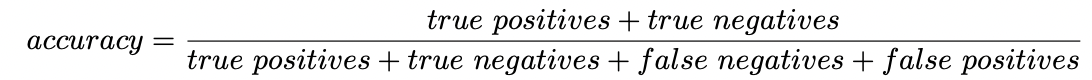

[Image Source](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312b86fe50cbb5aff369_s5DUTobZ_IV81v5DRuVDP8x4TGzIgu6HBRnU2uFw6GAJeotedHvzL6COHit7yz7Uuvs8wieZIe2gCJNy4RkZQHZSzZqehgr8MngwkhbcI0p0loYlC35lKgzonTlvroC5t0Swwp820neVOEgsDWwlzfuWWLCmp_tSQIU5xVVKC6bd2lKV67_AbMDTVOnw5w.png)



In [124]:
print('Accuracy of Model :')

(1547+77)/(1547+77+316+60)

Accuracy of Model :


0.812

### Precision

Precision answers the question- **"Out of all POSITIVE predictions made, how many were true?"**

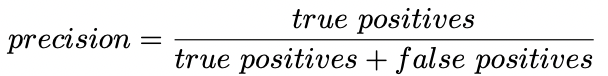

[Image Source](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312b93b4e700f7ed539f_F0UROoldDgIawO9KVBShiUK2lDPt1v5wTm5YMr-oOE83oOBbMMkWYOEeZnnWGI-0ZwwcNx1BvMGKSv-GbF4pggh2q8Z6P1fQgboW2zL6ktqOaJetXbGSUQFx6P1Ah-Zz8XPB596qGuhXzLdJyhv0altnSKkqlw1veOuvvPjLU8NcGNVlpTTl-PYhyZLN5Q.png)

In [127]:
print('Precision of Model:')

1547/(1547+316)

Precision of Model:


0.8303811057434246

### Recall

Recall answers the question - **"Out of ALL the data points that should be predicted as true, how many did we correctly predict as true?”**

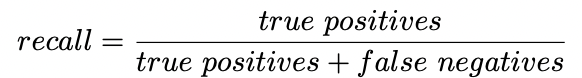

[Image Source](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312bddc623f50aa43b52_Ttp9NjMsqUUS0vllpfAWCC6lLMbluniEMHDBspNXPNKi7iDThZzJ-xMgHL5vDWnKdElq50g0wvBxIco9oaY8_sBbqxpr0H_4twHr2fyOjB6sm2g9B2V9cojcc44dcRLVyUKmfH4VsbfVGSWwcrce40ONkrRm0FBJ8ZKo6AiNH2KSWsDD8hJSmBXMSk7Fpg.png)

In [129]:
print('Recall Score of the Model:')

1547/(1547+60)

Recall Score of the Model:


0.9626633478531424

### F1 Score

F1 Score is a measure that combines recall and precision. As we have seen there is a trade-off between precision and recall, F1 can therefore be used to measure how effectively our models make that trade-off. 

One important feature of the F1 score is that the result is zero if any of the components (precision or recall) fall to zero. Thereby it penalizes extreme negative values of either component.

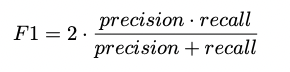

[Image Source](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312b1a6a71e630ff6647_AxQGlrOBWDDXnJ1vy1RJw84ZxP9kwM6V20lnT4YOie8uFDFWJYKdCVULk-LBENS4QVQxAgrXhXaPCI3UnNza5gBXoHk0-W2lWCxfzeRr4MEunBo5gtLh5yOtZEMuUQkHwikAjm6YGBTUyOxjmro13KUPHhbjiei37LzZnytsZhbRSwiF4236Bx9JBjArIQ.png)

In [130]:
precision = 83
recall = 96

f1_score = 2*(precision*recall)/(precision+recall)

In [131]:
print('F1 Score of the Model:')

print(f1_score)

F1 Score of the Model:
89.02793296089385


## Concluding Remarks

As the exploratory analysis suggested, the target demographic to minimize churn are women in the age group of 50+ and mostly in Germany. 

The logistic model has an overall accuracy of 81% which is a decent score for this data size of 10,000. 

## Future Scope

The `Balance` column had about 3500 data points with zero- those customers has zero balance in their accounts. This outlier could be delved into further with the following questions-

1. Does the bank offer zero balance accounts? If so, is it available for all the countries in the data set? 

2. If not, then how to impute the values for this column? 

3. In the present case, the column has been scaled in the (0,1) range with the MinMaxScaler. Could another type of scaling achieve a different result?

## References

1. [Scikit Learn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
3. [Precision, Recall, F1 Scores](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score) 
4. [Normal Distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html)
5. [Uniform Distribution](https://www.mathsisfun.com/data/random-variables-continuous.html)